## 확률적 경사 하강법

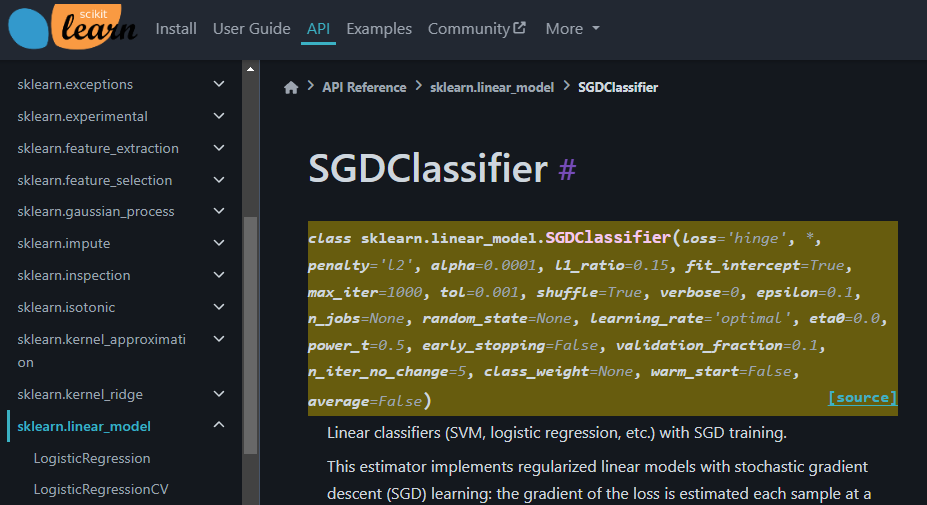

### SGDClassifier

In [ ]:
# SGDClassifier
# class sklearn.linear_model.SGDClassifier(
    # loss='hinge', *, penalty='l2', 
    # alpha=0.0001, l1_ratio=0.15, 
    # fit_intercept=True, max_iter=1000, 
    # tol=0.001, shuffle=True, verbose=0, 
    # epsilon=0.1, n_jobs=None, 
    # random_state=None, learning_rate='optimal', 
    # eta0=0.0, power_t=0.5, early_stopping=False, 
    # validation_fraction=0.1, n_iter_no_change=5, 
    # class_weight=None, warm_start=False, average=False
# )[source] 

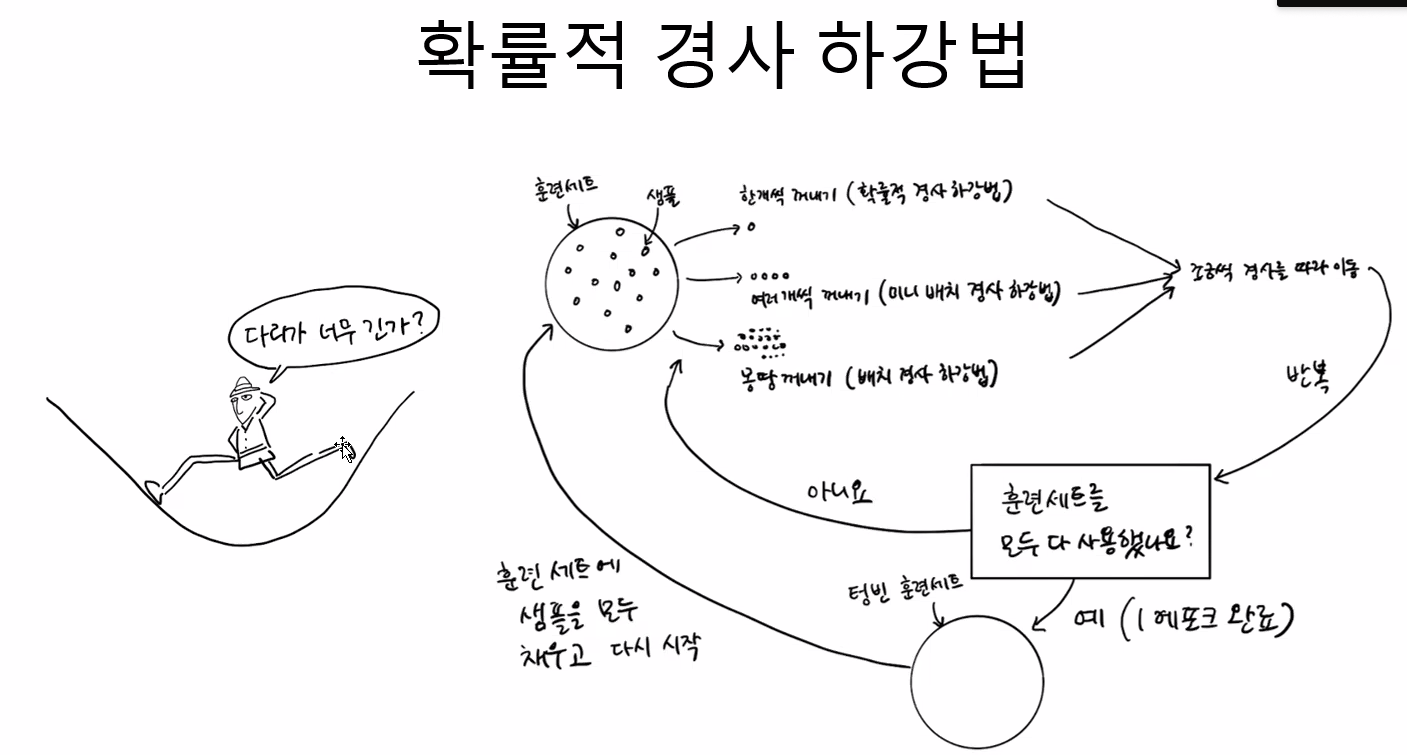

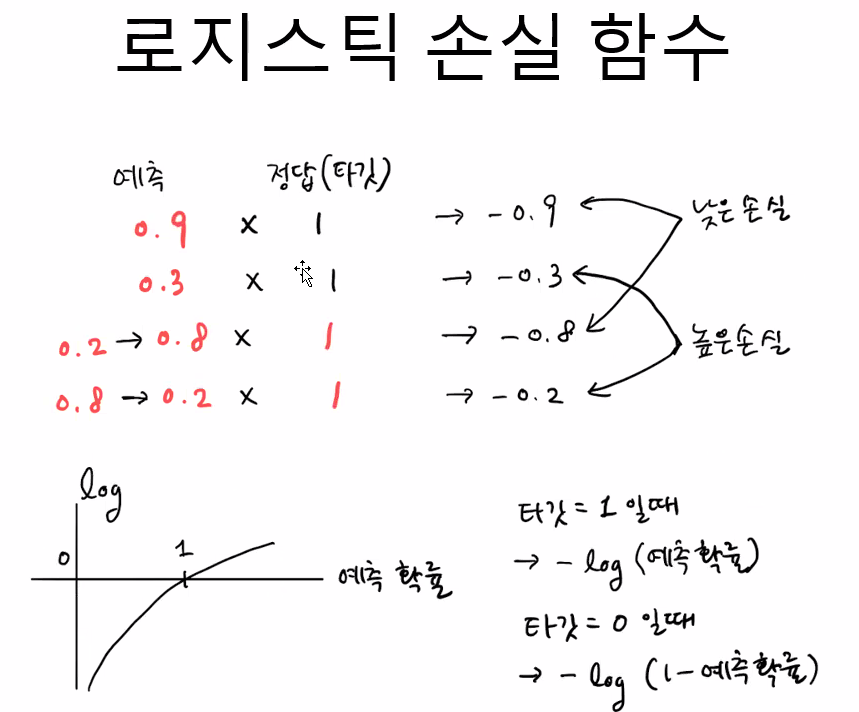

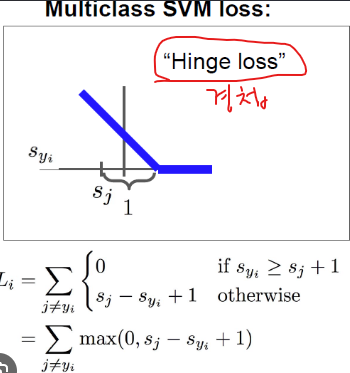

In [ ]:
# Hinge loss : 마진 기반 손실 함수 

In [7]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [8]:

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [10]:

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# SGDClassifier
# class sklearn.linear_model.SGDClassifier(
    # loss='hinge', *, penalty='l2', 
    # alpha=0.0001, l1_ratio=0.15, 
    # fit_intercept=True, max_iter=1000, 
    # tol=0.001, shuffle=True, verbose=0, 
    # epsilon=0.1, n_jobs=None, 
    # random_state=None, learning_rate='optimal', 
    # eta0=0.0, power_t=0.5, early_stopping=False, 
    # validation_fraction=0.1, n_iter_no_change=5, 
    # class_weight=None, warm_start=False, average=False
# )[source] 
# 교차로 최소가 되는 과정 선긋는 방법. svm, hinge

In [11]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd = SGDClassifier(random_state=42)
sgd.fit(train_scaled, train_target)
print( sgd.score(train_scaled, train_target) )
print( sgd.score(test_scaled, test_target) )

0.907563025210084
0.925


In [15]:
# 교재
sgd2 = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sgd2.fit(train_scaled, train_target)

print(sgd2.score(train_scaled, train_target))
print(sgd2.score(test_scaled, test_target))

0.773109243697479
0.775


c:\anaconda3\envs\mldltest1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [18]:
# partial
# 반복 횟수가 적어서 추가로 훈련할 경우 partial_fit() 메서드를 사용하여 1 epoch씩 이어서 훈련한다.
sgd2.partial_fit(train_scaled, train_target) 
print(sgd2.score(train_scaled, train_target))
print(sgd2.score(test_scaled, test_target))

0.7815126050420168
0.8


In [19]:
# 딥러닝에서는 히스토리로 받아서 했다.
# 여기서는 스코어로 그냥 그래프 만든다.

# 에포크와 과대/과소적합

In [20]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [21]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [22]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append( sc.score(train_scaled, train_target))
    test_score.append( sc.score(test_scaled, test_target))

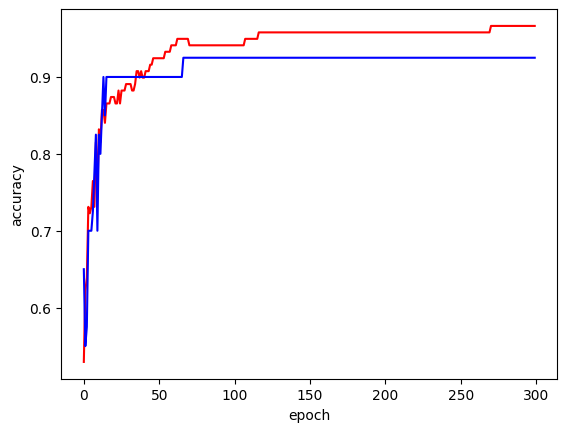

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_score, 'r')
plt.plot(test_score, 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 최종 모델 만들기

In [24]:
# 반복횟수와 Accuracy를 체크 한다.

In [30]:
sgd_final = SGDClassifier(loss='log_loss', 
                   max_iter=100, 
                   tol=None, 
                   random_state=42)
sgd_final.fit(train_scaled, train_target)

print(sgd_final.score(train_scaled, train_target))
print(sgd_final.score(test_scaled, test_target))

0.957983193277311
0.925


In [33]:
# 좀 더 나은 모델 
sgd_final2 = SGDClassifier(loss='hinge', 
                   max_iter=100,  
                   random_state=42)
sgd_final2.fit(train_scaled, train_target)

print(sgd_final2.score(train_scaled, train_target))
print(sgd_final2.score(test_scaled, test_target))

0.907563025210084
0.925


In [34]:
sgd_final3 = SGDClassifier(loss='hinge', 
                   max_iter=100,  
                   random_state=42,
                   tol=None)
sgd_final3.fit(train_scaled, train_target)

print(sgd_final3.score(train_scaled, train_target))
print(sgd_final3.score(test_scaled, test_target))

0.9495798319327731
0.925


In [ ]:
# xg부스트 : 최고의 성능이다
